In [1]:
# Fixing Outliers using IQR method 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import iqr
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('WorkingDataFrame4', index_col=0)

In [4]:
target = df.iloc[:,:7]
target.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998


In [5]:
target2 = df.iloc[:,11:13]
target2.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [6]:
targets = pd.concat([target, target2], axis=1, join_axes=[df.index])
df = df.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1DAY','Y1','Y2'], axis=1)
df.head(15)

,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,122.000000,1.0,0.029074,51.345000,1,3.864345,11.111111,0.640426,0.959575,0.057276,0.005147,0.009712,0.011538
1,259.000000,0.0,-0.013352,25.936000,0,12.028832,0.000000,0.644753,1.625716,0.092969,0.005894,0.020088,0.019673
2,90.000000,1.0,0.020715,7.378000,0,3.369134,0.000000,0.636816,0.397194,0.026978,0.005064,0.002739,0.004980
3,209.000000,1.0,0.020023,8.526000,0,3.299697,0.000000,0.539634,0.628704,0.042251,0.006641,0.004897,0.009131
4,80.000000,1.0,-0.034895,632.298000,1,3.726269,5.000000,0.587413,1.093716,0.059766,0.005562,0.012368,0.013862
5,94.000000,1.0,-0.057556,197.591000,1,5.724394,0.000000,0.643137,1.156637,0.067652,0.005147,0.007969,0.015024
6,128.000000,1.0,0.004106,5.146000,0,3.463095,0.000000,0.765657,1.158214,0.057940,0.006807,0.008799,0.011206
7,91.000000,0.0,0.040620,500.459962,0,2.421469,0.000000,0.826347,0.834731,0.051797,0.004565,0.009961,0.010127
8,100.000000,1.0,-0.029316,279.600000,0,4.816591,0.000000,0.540323,1.117540,0.076119,0.004814,0.010293,0.019424
9,106.000000,1.0,-0.024925,494.008000,1,3.056608,0.000000,0.514286,0.672948,0.038101,0.006724,0.007471,0.012202


In [7]:
# Checking mean of columns BEFORE fixing outliers 
df.mean()

C1     149.728788
C2       0.863636
C4       0.007282
C7     500.459962
C3'      0.529326
C5'      4.627711
C6'      5.270794
T4'      0.628067
T3'      0.945949
T5'      0.056457
S1'      0.005687
S2'      0.009970
S3'      0.012016
dtype: float64

In [8]:
# Defining functin to replace outliers using IQR of each column
def outlier_replace(x): 
    if x > (Q3 + (1.5*IQR)): 
        x = Q3
    elif x < (Q1 - (1.5*IQR)): 
        x = Q1
    else: 
        pass
    return(x)

Text(0.5, 1.0, 'Fixed Outliers - C1')

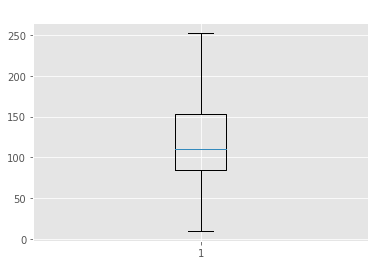

In [9]:
Q1 = df['C1'].quantile(0.25)
Q3 = df['C1'].quantile(0.75)
IQR = iqr(df['C1'])
df['C1'] = df['C1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['C1'])
plt.title("Fixed Outliers - C1", color='white')

Text(0.5, 1.0, 'Fixed Outliers - C7')

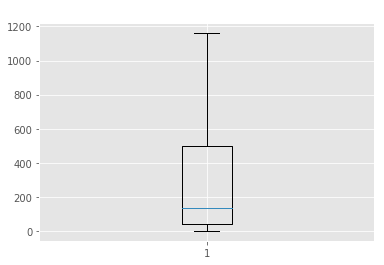

In [10]:
Q1 = df['C7'].quantile(0.25)
Q3 = df['C7'].quantile(0.75)
IQR = iqr(df['C7'])
df['C7'] = df['C7'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['C7'])
plt.title("Fixed Outliers - C7", color='white')

Text(0.5, 1.0, "Fixed Outliers - T3'")

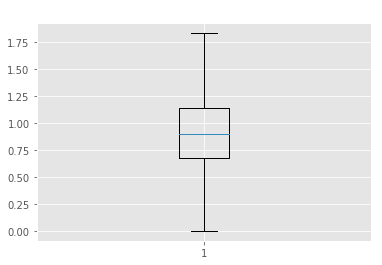

In [11]:
Q1 = df["T3'"].quantile(0.25)
Q3 = df["T3'"].quantile(0.75)
IQR = iqr(df["T3'"])
df["T3'"] = df["T3'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T3'"])
plt.title("Fixed Outliers - T3'", color='white')

Text(0.5, 1.0, "Fixed Outliers - T4'")

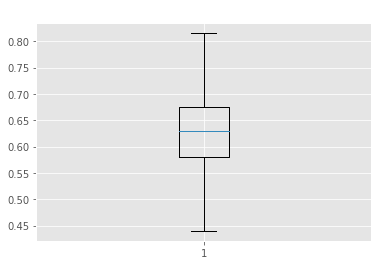

In [12]:
Q1 = df["T4'"].quantile(0.25)
Q3 = df["T4'"].quantile(0.75)
IQR = iqr(df["T4'"])
df["T4'"] = df["T4'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T4'"])
plt.title("Fixed Outliers - T4'", color='white')

Text(0.5, 1.0, "Fixed Outliers - T5'")

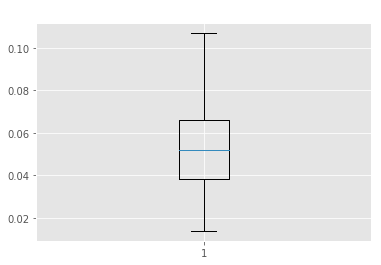

In [13]:
Q1 = df["T5'"].quantile(0.25)
Q3 = df["T5'"].quantile(0.75)
IQR = iqr(df["T5'"])
df["T5'"] = df["T5'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T5'"])
plt.title("Fixed Outliers - T5'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S1'")

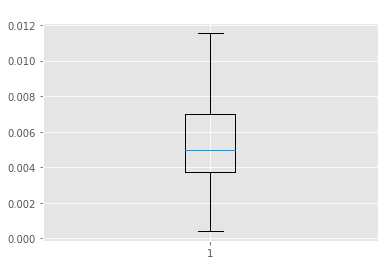

In [14]:
Q1 = df["S1'"].quantile(0.25)
Q3 = df["S1'"].quantile(0.75)
IQR = iqr(df["S1'"])
df["S1'"] = df["S1'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S1'"])
plt.title("Fixed Outliers - S1'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S2'")

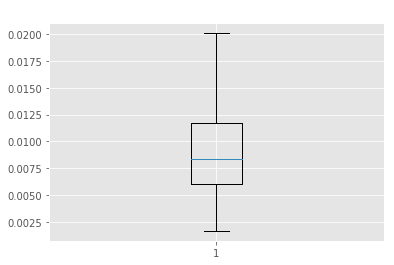

In [15]:
Q1 = df["S2'"].quantile(0.25)
Q3 = df["S2'"].quantile(0.75)
IQR = iqr(df["S2'"])
df["S2'"] = df["S2'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S2'"])
plt.title("Fixed Outliers - S2'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S3'")

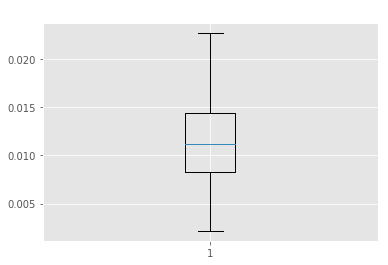

In [16]:
Q1 = df["S3'"].quantile(0.25)
Q3 = df["S3'"].quantile(0.75)
IQR = iqr(df["S3'"])
df["S3'"] = df["S3'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S3'"])
plt.title("Fixed Outliers - S3'", color='white')

Text(0.5, 1.0, "Fixed Outliers - C5'")

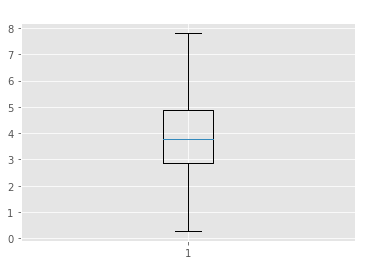

In [17]:
Q1 = df["C5'"].quantile(0.25)
Q3 = df["C5'"].quantile(0.75)
IQR = iqr(df["C5'"])
df["C5'"] = df["C5'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C5'"])
plt.title("Fixed Outliers - C5'", color='white')

Text(0.5, 1.0, "Fixed Outliers - C6'")

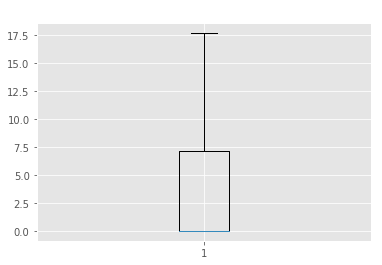

In [18]:
Q1 = df["C6'"].quantile(0.25)
Q3 = df["C6'"].quantile(0.75)
IQR = iqr(df["C6'"])
df["C6'"] = df["C6'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C6'"])
plt.title("Fixed Outliers - C6'", color='white')

In [19]:
df.mean()

C1     116.741618
C2       0.863636
C4       0.007282
C7     242.511292
C3'      0.529326
C5'      3.856359
C6'      3.323355
T4'      0.628953
T3'      0.915638
T5'      0.053088
S1'      0.005343
S2'      0.008876
S3'      0.011416
dtype: float64

In [20]:
# Exporting DataFrame as CSV 
df.to_csv('OutlierFix4', ',')

In [21]:
targets.to_csv('Targets4', ',')